In [1]:
import numpy as np
import pandas as pd

In [2]:
# random seed
np.random.seed(42) #rastgelelik elde etmek için kullanılıyor.

set1no = 900
set2no = 100

In [6]:
df1 = pd.DataFrame({
    "feature_1": np.random.normal(loc = 0, scale = 1, size = set1no), #ortalama: 0, std = 1, size 900
    "feature_2": np.random.normal(loc = 0, scale = 1, size = set1no), #ortalama: 0, std = 1, size 100
    "target": [0] * set1no
})

df2 = pd.DataFrame({
    "feature_1": np.random.normal(loc = 0, scale = 1, size = set2no), #ortalama: 0, std = 1, size 900
    "feature_2": np.random.normal(loc = 0, scale = 1, size = set2no), #ortalama: 0, std = 1, size 100
    "target": [1] * set2no
})

In [7]:
df1.head()

,feature_1,feature_2,target
0,-0.675178,-0.045512,0
1,-0.144519,-0.424236,0
2,-0.792420,-0.569833,0
3,-0.307962,0.329509,0
4,-1.893615,-1.517174,0


In [8]:
df2.head()

,feature_1,feature_2,target
0,-1.388543,-0.556119,1
1,-1.600271,-0.130060,1
2,-1.217283,1.669070,1
3,0.159463,-0.942558,1
4,-0.892788,1.614779,1


### **Concat
- Birden fazla tablo (DataFrame) varsa bunları alt alta (satır bazında) ya da yan yana (sütun bazında) birleştirmek için kullanırsın.

In [9]:
df = pd.concat([df1, df2]).reset_index(drop= True)

In [10]:
df

,feature_1,feature_2,target
0,-0.675178,-0.045512,0
1,-0.144519,-0.424236,0
2,-0.792420,-0.569833,0
3,-0.307962,0.329509,0
4,-1.893615,-1.517174,0
...,...,...,...
995,1.001632,0.028458,1
996,1.393455,-2.077812,1
997,0.710549,-0.320298,1
998,0.429341,1.643378,1


In [11]:
df["target"].unique()

array([0, 1], dtype=int64)

In [12]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [14]:
#upsampling --> azınlıkları arttırmak, umsample minority
#downsampling --> çoğunlukları azaltmak, downsample majority

### upsampling

In [16]:
df_minority = df[df["target"] == 1]

In [22]:
df_minority["target"].value_counts()

target
1    100
Name: count, dtype: int64

In [18]:
df_minority

,feature_1,feature_2,target
900,-1.388543,-0.556119,1
901,-1.600271,-0.130060,1
902,-1.217283,1.669070,1
903,0.159463,-0.942558,1
904,-0.892788,1.614779,1
...,...,...,...
995,1.001632,0.028458,1
996,1.393455,-2.077812,1
997,0.710549,-0.320298,1
998,0.429341,1.643378,1


In [19]:
df_majority = df[df["target"] == 0]

In [23]:
df_majority["target"].value_counts()

target
0    900
Name: count, dtype: int64

In [20]:
df_majority

,feature_1,feature_2,target
0,-0.675178,-0.045512,0
1,-0.144519,-0.424236,0
2,-0.792420,-0.569833,0
3,-0.307962,0.329509,0
4,-1.893615,-1.517174,0
...,...,...,...
895,3.926238,-0.325611,0
896,-2.084113,-0.164335,0
897,1.724697,0.212093,0
898,-0.287448,-0.993359,0


In [24]:
##upsampling veya downsampling için hazır kütüphaneler var. bunun en önemli kütüphanesi: sklearn

In [27]:
!pip install scikit-learn


You should consider upgrading via the 'C:\Users\valan\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [28]:
from sklearn.utils import resample

In [30]:
df_minority_upsampled = resample(df_minority, replace = True, n_samples=len(df_majority), random_state = 42)

In [31]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [33]:
df_upsampled

,feature_1,feature_2,target
0,-0.675178,-0.045512,0
1,-0.144519,-0.424236,0
2,-0.792420,-0.569833,0
3,-0.307962,0.329509,0
4,-1.893615,-1.517174,0
...,...,...,...
952,1.296063,2.184097,1
965,-0.728462,0.363116,1
976,0.950016,0.506241,1
942,0.978890,-0.596974,1


In [34]:
df_upsampled["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [36]:
df_majority_downsampled = resample(df_majority, replace = True, n_samples = len(df_minority), random_state = 42)

In [37]:
df_majority_downsampled

,feature_1,feature_2,target
102,-0.869663,-0.413606,0
435,-0.369527,-1.342128,0
860,-0.531214,0.322082,0
270,0.347676,-0.945746,0
106,-0.900621,0.486036,0
...,...,...,...
201,-0.190904,0.855556,0
269,-0.081523,-0.415967,0
862,-1.102292,-0.813014,0
815,0.814152,-0.158154,0


In [38]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [39]:
df_downsampled

,feature_1,feature_2,target
900,-1.388543,-0.556119,1
901,-1.600271,-0.130060,1
902,-1.217283,1.669070,1
903,0.159463,-0.942558,1
904,-0.892788,1.614779,1
...,...,...,...
201,-0.190904,0.855556,0
269,-0.081523,-0.415967,0
862,-1.102292,-0.813014,0
815,0.814152,-0.158154,0


In [40]:
df_downsampled["target"].value_counts()

target
1    100
0    100
Name: count, dtype: int64

- Upsampling yapmak, veriyi kopyalayıp yapıştırmak aslında. Dolayısıyla modelde overfitting yaşanabilir.

### SMOTE (Synthetic Minority Over-sampling Techniques)

- Birebir tekrarlamak değil, benzer dataları oluşturarak veriyi çoğaltır.

In [41]:
import matplotlib.pyplot as plt

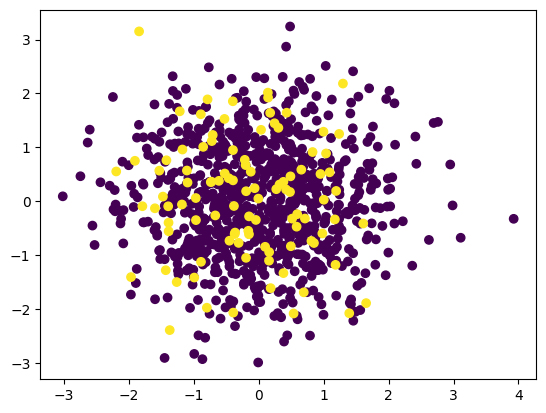

In [45]:
plt.scatter(df["feature_1"], df["feature_2"], c=df["target"])

In [46]:
!pip install imblearn

You should consider upgrading via the 'C:\Users\valan\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
oversample = SMOTE()

- resample yaparken ve hatta tüm ML kütüphanelerinde (x,y) olarak bir tuple oluşturulur. y burada hedeflenendir. x ise y'yi değiştiren etmenlerdir.

In [50]:
(x,y) = oversample.fit_resample(df[["feature_1", "feature_2"]], df["target"])

C:\Users\valan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [51]:
x

,feature_1,feature_2
0,-0.675178,-0.045512
1,-0.144519,-0.424236
2,-0.792420,-0.569833
3,-0.307962,0.329509
4,-1.893615,-1.517174
...,...,...
1795,-0.319929,-0.746879
1796,0.794455,0.849616
1797,0.225699,1.529741
1798,0.161328,1.764309


In [52]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [54]:
type(x)

pandas.core.frame.DataFrame

In [55]:
oversample_df = pd.concat([x,y], axis=1)

In [57]:
oversample_df["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

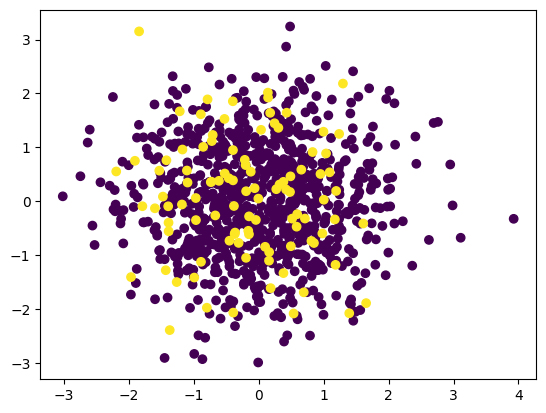

In [58]:
plt.scatter(df["feature_1"], df["feature_2"], c=df["target"])

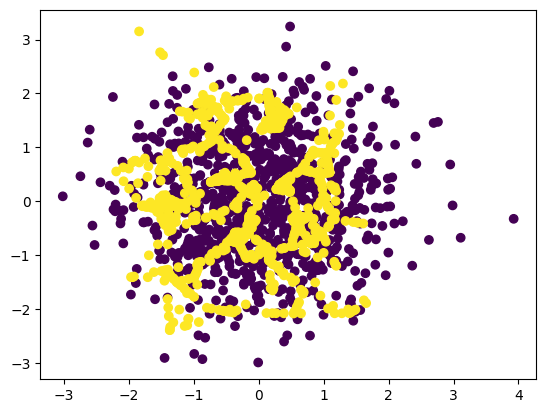

In [59]:
plt.scatter(oversample_df["feature_1"], oversample_df["feature_2"], c=oversample_df["target"])